In [1]:
from __future__ import print_function
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import sklearn.datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np

In [58]:
def loaddocuments():
    rootdir = 'D:\\Data\\lsi\\bbc'
    documents = []
    r = ''
    
    df = pd.read_excel('./path_module2.xlsx')
    #df = df[(df['MODULENAME'] == 'BR_AAA') | (df['MODULENAME'] == 'NP_HAL') | (df['MODULENAME'] == 'RT_NSE') | \
    #    (df['MODULENAME'] =='RTADAPT_FWD_FRAME') | (df['MODULENAME'] =='NP_HAL') | (df['MODULENAME'] =='RT_NSE')]
    j  = 0
    target = np.zeros((df.count()['MODULENAME'],), dtype=np.int64)
    categories = df['MODULENAME'].unique().tolist()
    documents = []
    for index, row in df.iterrows():
        #data = ' '.join(row['FILENAME'].split('.')[0].split('_'))
        arr = row['FILEPATH'].split('.')[0].replace('\\', '_').split('_')
        arr = list(filter(lambda x: len(x)>0, arr))
        data = ' '.join(arr)

        documents.append(data)
        target[j] = categories.index(row['MODULENAME'])
        j = j + 1

    return sklearn.datasets.base.Bunch(data=documents, target=target, target_names=categories), categories

In [59]:
dataset, categories = loaddocuments()
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

14243 documents
100 categories



In [60]:
vectorizer = HashingVectorizer(n_features=1000,
                                       norm=None,
                                       binary=False)

In [61]:
X = vectorizer.fit_transform(dataset.data)

In [62]:
print("n_samples: %d, n_features: %d" % X.shape)

n_samples: 14243, n_features: 1000


In [63]:
svd = TruncatedSVD(15)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

Explained variance of the SVD step: 46%


In [64]:
km = KMeans(n_clusters=len(dataset.target_names), init='k-means++', max_iter=100, n_init=1)

In [65]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=100, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
Sum_of_squared_distances = []
Homogenity = []
Completeness = []
Silhouette = []
K = range(1,99)
for k in K:
    km1 = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    km1 = km1.fit(X)
    print('Clusters={}'.format(k))
    Sum_of_squared_distances.append(km1.inertia_)
    Homogenity.append(metrics.homogeneity_score(labels, km1.labels_))
    Completeness.append(metrics.completeness_score(labels, km1.labels_))
    if k > 1:
        Silhouette.append(metrics.silhouette_score(X, km1.labels_, sample_size=1000))

Clusters=1
Clusters=2
Clusters=3
Clusters=4
Clusters=5
Clusters=6
Clusters=7
Clusters=8
Clusters=9
Clusters=10
Clusters=11
Clusters=12
Clusters=13
Clusters=14
Clusters=15
Clusters=16
Clusters=17
Clusters=18
Clusters=19
Clusters=20
Clusters=21
Clusters=22
Clusters=23
Clusters=24
Clusters=25
Clusters=26
Clusters=27
Clusters=28
Clusters=29
Clusters=30
Clusters=31
Clusters=32
Clusters=33
Clusters=34
Clusters=35
Clusters=36
Clusters=37
Clusters=38
Clusters=39
Clusters=40
Clusters=41
Clusters=42
Clusters=43
Clusters=44
Clusters=45
Clusters=46
Clusters=47
Clusters=48
Clusters=49
Clusters=50
Clusters=51
Clusters=52
Clusters=53
Clusters=54
Clusters=55
Clusters=56
Clusters=57
Clusters=58
Clusters=59
Clusters=60
Clusters=61
Clusters=62
Clusters=63
Clusters=64
Clusters=65
Clusters=66
Clusters=67
Clusters=68
Clusters=69
Clusters=70
Clusters=71
Clusters=72
Clusters=73
Clusters=74
Clusters=75
Clusters=76
Clusters=77
Clusters=78
Clusters=79
Clusters=80
Clusters=81
Clusters=82
Clusters=83
Clusters=84
C

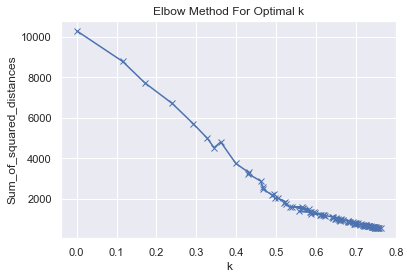

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Homogenity, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [69]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()

Homogeneity: 0.765
Completeness: 0.763
V-measure: 0.764
Adjusted Rand-Index: 0.465
Silhouette Coefficient: 0.415



In [37]:
tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
random_state = 1

centroids = km.cluster_centers_
model = TSNE(n_components=2, random_state=random_state, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_centroids1 = model.fit_transform(centroids)
#print(centroids)
#plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')
#plt.show()
if type(X) != np.ndarray:
    X = np.asarray(X.toarray())

X = np.append(X, km.cluster_centers_, axis=0)
labels = np.append(labels, range(true_k))
transformed_centroids = model.fit_transform(X)
#else:
#    print('666666666666666666')
#    transformed_centroids = model.fit_transform(X.toarray())

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]



In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.plot([[0,0],[1,1]], linewidth=4,label='fff')
#plt.show()
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    print('4444', len(labels))

    

4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343

4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343
4444 14343

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36947 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38567 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36947 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21270 missing from curre

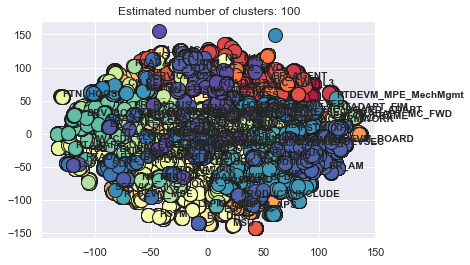

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.plot([[0,0],[1,1]], linewidth=4,label='fff')
#plt.show()
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    print('4444', len(labels))
    class_member_mask = (labels == k)

    #if type(X) != np.ndarray:
    #    X = X.toarray()
    xy = transformed_centroids[class_member_mask]
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    #xy = transformed_centroids[class_member_mask]
    #plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
    #         markeredgecolor='k', markersize=6)

for i, txt in enumerate(X[-len(km.cluster_centers_):]):
    plt.annotate(categories[i], (transformed_centroids[len(X) - len(km.cluster_centers_) + i][0], transformed_centroids[len(X) - len(km.cluster_centers_) + i][1]), weight='bold')
    
plt.title('Estimated number of clusters: %d' % true_k)
plt.show()